In [12]:
import torch
#Use this space for manually computing the scaled dot product attention

In [13]:
#This is how you'll do diagrams for tensors from here on out
import pandas as pd
#pd.DataFrame(input)

def printTensor(tensor):
    df = pd.DataFrame(tensor)
    print(df)

In [33]:
input = torch.tensor([[-1.5898,1.5792,0.8666,1.0245],[2.2796,0.9813,1.4023,-0.6616],[0.1588,0.4028,-1.7044,-1.8284],[0.4366,-1.0197,-0.4217, 1.4877],[-0.8311,-0.1762,-1.8709,2.2313]], dtype=torch.float32)
input
#Paper example input from embedding layers

tensor([[-1.5898,  1.5792,  0.8666,  1.0245],
        [ 2.2796,  0.9813,  1.4023, -0.6616],
        [ 0.1588,  0.4028, -1.7044, -1.8284],
        [ 0.4366, -1.0197, -0.4217,  1.4877],
        [-0.8311, -0.1762, -1.8709,  2.2313]])

In [34]:
#Lets try to initialize the K,Q,V wieghts
import torch.nn as nn
import torch.nn.init as init
d_model = 128
input = nn.Linear(4, d_model)(input) # We need to reshape the input to be compatible for multiplication with our QKV weights
input = input.reshape(1,5,d_model)
# Our example input has a column dimension of 4, or 4 featues in the sequence. 
# This is important for the linear layers


# Set dimensions of the weights
W_Q = nn.Linear(d_model, d_model, bias=False)
W_K = nn.Linear(d_model, d_model, bias=False)
W_V = nn.Linear(d_model, d_model, bias=False)

nn.init.kaiming_normal_(W_Q.weight)
nn.init.kaiming_normal_(W_K.weight)
nn.init.kaiming_normal_(W_V.weight)

with torch.no_grad():
    print("WQ matrix:")
    printTensor(W_Q.weight)
    print("\nWK matrix:")
    printTensor(W_K.weight)
    print("\nWV matrix:")
    printTensor(W_V.weight)



WQ matrix:
          0         1         2         3         4         5         6    \
0    0.066657 -0.063596  0.001460 -0.044673  0.062044 -0.049699 -0.201590   
1   -0.000749  0.009972  0.213238  0.018737  0.009318  0.069274 -0.094830   
2   -0.014460 -0.103195  0.025643  0.138807 -0.090771  0.144126  0.211947   
3    0.034983  0.044028  0.078618 -0.210516 -0.108374  0.126922  0.092009   
4   -0.105210 -0.014070  0.121018 -0.204126 -0.205072 -0.182256  0.044908   
..        ...       ...       ...       ...       ...       ...       ...   
123  0.023293 -0.023855  0.057618 -0.177262 -0.227320  0.098381 -0.078882   
124  0.167402  0.092073  0.007225 -0.121935 -0.286025  0.232698  0.117591   
125  0.024193  0.239837 -0.027919  0.306805 -0.005725  0.105184  0.109408   
126 -0.055597  0.070930  0.026788  0.201177 -0.076031 -0.170954 -0.058242   
127 -0.234322 -0.016151 -0.079854 -0.123666 -0.104125  0.133104  0.148430   

          7         8         9    ...       118       119      

In [35]:
import math
# Lets compute Q,K,V first linear projection
with torch.no_grad():
    Q = W_Q(input)
    K = W_K(input)
    V = W_V(input)
    print("Q matrix:")
    printTensor(Q.numpy()[0, :, :]) # Changing print statements so I can see only the last two dimensions
    print("\nK matrix:")
    printTensor(K.numpy()[0, :, :])
    print("\nV matrix:",)
    printTensor(V.numpy()[0, :, :])
    

Q matrix:
        0         1         2         3         4         5         6    \
0  1.053274 -1.486099  0.999819 -0.984640 -0.339790 -1.043898 -1.936681   
1  0.374394  1.374941  2.334656  1.682233  0.727857  0.458205  1.111102   
2 -0.359419  0.033485  0.756496 -0.123607 -0.112288 -0.572025  1.038903   
3  0.724385  0.406115 -0.340476 -1.066427  0.281404  0.472168 -0.360281   
4  1.068610 -0.872180 -0.827099 -2.542412 -0.904259 -0.369519 -1.903687   

        7         8         9    ...       118       119       120       121  \
0  2.504586 -1.934478  0.092695  ...  0.010611 -1.136209 -2.275481 -1.574087   
1  0.195757  0.154712 -0.018623  ... -1.660842  3.167106  1.809556  0.842297   
2 -0.316079  1.548958  0.596741  ... -0.067625  0.607134 -1.017257  2.076622   
3  0.579376 -0.865371 -0.582735  ... -1.846507  0.471877  0.630162 -1.252550   
4  1.370767 -1.083481  0.160943  ... -0.610888 -1.295567 -1.226697 -1.319538   

        122       123       124       125       126       

In [36]:
# Scaled dot-product    
with torch.no_grad():
    attention_weights = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(d_model)
    print("Scaled Dot Product:")
    printTensor(attention_weights.numpy()[0, :, :])

Scaled Dot Product:
          0         1         2         3         4
0  1.495476  3.379795 -0.158017 -0.624081 -1.742781
1 -0.001339 -1.099216 -1.134368  2.743841  3.768891
2  1.742415 -0.326832 -2.134887  2.027756  3.012411
3  1.960517  1.379462  0.679449 -1.159631 -0.906804
4  3.803500  2.940543 -0.342331 -1.745400 -2.191775


In [37]:
with torch.no_grad():
    #softmax
    attention_weights = torch.softmax(attention_weights, dim=-1)
    print("Softmax:")
    printTensor(attention_weights.numpy()[0, :, :])

Softmax:
          0         1         2         3         4
0  0.126063  0.829728  0.024126  0.015138  0.004946
1  0.016498  0.005503  0.005313  0.256833  0.715853
2  0.165617  0.020914  0.003429  0.220306  0.589734
3  0.515982  0.288593  0.143309  0.022781  0.029334
4  0.692461  0.292158  0.010962  0.002695  0.001725


In [38]:
with torch.no_grad():
    #Last linear layer
    print("Output:")
    output = torch.matmul(attention_weights, V)
    printTensor(output.numpy()[0, :, :])

Output:
        0         1         2         3         4         5         6    \
0 -0.241097  0.992921 -1.199499 -0.907472 -1.946889 -2.660482  1.358338   
1 -0.283341  0.828002  2.288927 -0.046697  0.823063  0.793904 -0.791573   
2 -0.297473  0.534612  2.242797 -0.131979  0.656556  0.396121 -0.670073   
3 -0.077340 -0.132732  0.633025 -0.599707 -0.953043 -1.633289  0.656657   
4 -0.315177 -0.416626  1.168727 -0.634154 -0.671003 -1.839082  0.328302   

        7         8         9    ...       118       119       120       121  \
0  0.567941  1.638785 -0.002723  ... -1.603718 -0.447689  0.250783 -0.310660   
1 -0.726860  0.165831 -0.163462  ... -0.463741 -1.089884 -0.689989  2.427258   
2 -0.473367  0.122169 -0.330691  ... -0.616143 -0.797235 -0.707129  2.152309   
3  0.586918  0.473932 -0.710438  ... -1.165699 -0.048447 -0.481574  0.468849   
4  0.729771  0.360782 -0.881624  ... -1.418529  0.344768 -0.523900  0.521926   

        122       123       124       125       126       12

In [39]:
# Applying layer normalization to a mini batch
# Remember d_model is our embedding dimension
dropout = nn.Dropout(p=0.1)
layer_norm = nn.LayerNorm(output.size()[-1])
# We now will call the norm layer with our output
output = dropout(output)
output = layer_norm(output)
print(output)

tensor([[[-1.9955e-01,  2.0107e-02, -1.0727e+00, -8.0666e-01, -1.7536e+00,
          -2.4038e+00,  1.2576e+00,  5.3754e-01,  1.5132e+00,  2.0107e-02,
          -1.9936e+00,  1.5892e+00,  1.2584e+00,  3.8098e-01,  2.3799e-01,
           1.2612e-01,  3.9257e-01,  5.1634e-01,  2.0107e-02,  3.8195e-01,
           3.2149e-01, -2.3478e-01,  8.5010e-01,  2.0107e-02,  3.8236e-01,
           2.7220e-01, -8.3864e-01, -3.2977e+00,  9.6837e-01,  8.1118e-01,
          -1.4694e-01,  8.6746e-01, -4.7537e-01, -2.5918e-01,  2.6218e-02,
           1.1532e+00, -1.4637e+00,  9.5867e-03, -1.4466e+00, -6.2710e-01,
          -8.3262e-02, -1.6121e-01, -7.6712e-02, -1.0796e+00,  3.0268e-01,
           2.0107e-02, -1.0355e-01, -1.1874e-01,  2.0107e-02,  4.9191e-01,
          -1.3745e+00,  4.2661e-01, -2.3794e-01,  4.1214e-01, -1.5925e-02,
          -1.1717e+00,  2.4289e+00,  2.0107e-02, -1.3847e+00,  2.0107e-02,
           2.0107e-02, -2.4601e-02,  8.3843e-01,  6.9493e-02, -1.1100e-01,
           2.0107e-02, -1

In [40]:
with torch.no_grad():
    printTensor(output.numpy()[0, :, :])

        0         1         2         3         4         5         6    \
0 -0.199549  0.020107 -1.072721 -0.806664 -1.753645 -2.403779  1.257648   
1 -0.394051  0.658730  2.042672 -0.125640  0.654051  0.626429 -0.875501   
2 -0.408901  0.527748  2.450591 -0.222610  0.665016  0.371853 -0.828323   
3 -0.018873 -0.098469  1.001886 -0.769489  0.092260 -2.254695  0.092260   
4 -0.270122 -0.388551  1.462139 -0.642486 -0.685502 -2.049080  0.481054   

        7         8         9    ...       118       119       120       121  \
0  0.537540  1.513155  0.020107  ... -1.440993  0.020107  0.248587 -0.262926   
1 -0.814198  0.031452 -0.280489  ... -0.564945 -1.158093 -0.779270  2.173714   
2 -0.606899  0.063475 -0.446294  ... -0.074046 -0.971465 -0.870036  2.348732   
3  0.935632  0.773276 -0.928604  ... -1.582792  0.022644 -0.599738  0.765972   
4  0.949717  0.518971 -0.931375  ... -1.558140  0.500276 -0.513779  0.707085   

        122       123       124       125       126       127  
0 -0

In [41]:
# a class for making multihead attetnion sublayer easier
import torch
import torch.nn as nn
import math

class MultiheadAttentionSublayer(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super().__init__()
        self.linears = nn.ModuleList([nn.Linear(embed_dim, embed_dim) for _ in range(3)])
        self.layer_norm = nn.LayerNorm(embed_dim)
        self.dropout = nn.Dropout(0.1)
        
    def forward(self, x, attn_mask):
        q, k, v = [l(x) for l in self.linears]
        x, attn = self.attention(q, k, v, attn_mask)
        x = x + self.dropout(x)
        x = self.layer_norm(x)
        return x, attn

    def attention(self, q, k, v, attn_mask):
        scores = torch.matmul(q, k.transpose(-2, -1)) / math.sqrt(k.size(-1))
        if attn_mask is not None:
            scores = scores.masked_fill(attn_mask, -1e9)
        attn = torch.softmax(scores, dim=-1)
        x = torch.matmul(attn, v)
        return x, attn
        
model = MultiheadAttentionSublayer(d_model, 6)
attn_mask = None
attention_weights, weighted_output = model(input, attn_mask) # Compute the output of the forward method
print(weighted_output.shape) # Print the output tensor to verify it
print(input.shape)
print(d_model)


torch.Size([1, 5, 5])
torch.Size([1, 5, 128])
128


In [42]:
# Lets do the last step in the encoder - feed forward
import torch.nn as nn

# Define the feedforward layer
feedforward = nn.Sequential(
    nn.Linear(output.size()[-1], 16),
    nn.ReLU(),
    nn.Linear(16, d_model)
)

# Pass the normalized tensor through the feedforward layer
encoder_output = feedforward(output)

In [43]:
with torch.no_grad():
    printTensor(encoder_output.numpy()[0, :, :])

        0         1         2         3         4         5         6    \
0 -0.109593  0.218936 -0.121593 -0.131467 -0.242980 -0.466432  0.042785   
1 -0.155166 -0.200968 -0.079917 -0.262690  0.072086 -0.512122 -0.169378   
2 -0.121902 -0.125374 -0.261691 -0.311944  0.185182 -0.524246 -0.097686   
3 -0.172394  0.298224 -0.157668 -0.315232 -0.073443 -0.325669 -0.099018   
4 -0.354316  0.433445 -0.024942 -0.269588 -0.031008 -0.382633 -0.227058   

        7         8         9    ...       118       119       120       121  \
0 -0.201919 -0.215250 -0.230467  ...  0.225229 -0.153292  0.333510  0.099333   
1 -0.175118 -0.304439 -0.112535  ...  0.474310 -0.097140  0.087872  0.255454   
2 -0.524959 -0.581443 -0.119157  ...  0.363288 -0.192250  0.105037 -0.087728   
3 -0.254053 -0.297551 -0.238970  ...  0.081981 -0.243965  0.192384 -0.034337   
4 -0.158027 -0.436011 -0.275813  ...  0.162499 -0.144677  0.300323  0.134707   

        122       123       124       125       126       127  
0 -0

In [44]:
# Apply another norm layer to finish the encoder!!!!
# Applying layer normalization to a mini batch
# Remember d_model is our embedding dimension
dropout = nn.Dropout(p=0.1)
layer_norm = nn.LayerNorm(encoder_output.size()[-1])
# We now will call the norm layer with our output
encoder_output = dropout(encoder_output)
encoder_output = layer_norm(encoder_output)
print(encoder_output)

tensor([[[-4.0309e-01,  8.3658e-02, -4.5639e-01,  8.3658e-02, -9.9552e-01,
          -1.9880e+00,  2.7368e-01, -8.1315e-01, -8.7236e-01, -9.3995e-01,
           1.6247e+00,  1.1698e+00, -8.4400e-01, -1.4344e+00,  4.2274e-01,
           1.0744e+00,  4.7138e-01, -3.4733e-01,  1.7209e+00,  4.2492e-01,
          -8.8489e-01,  1.0701e+00,  1.0403e+00, -1.4929e+00,  4.5186e-01,
           9.7795e-01, -8.8743e-01, -8.3515e-01,  1.2293e-03, -1.5224e+00,
           1.2915e-01,  8.3658e-02,  1.7728e+00, -1.0935e-01, -9.7299e-01,
          -1.1007e+00, -1.1242e+00, -2.3251e-01,  1.8061e+00, -6.3683e-01,
           4.4676e-01, -5.7995e-01,  4.4678e-02,  8.3658e-02,  2.8151e+00,
          -1.6639e-01,  2.8719e-01, -1.1473e+00, -6.3441e-01,  3.9193e-01,
           1.0155e+00,  3.6493e-01, -6.7620e-01, -4.7129e-01, -2.5101e-01,
           1.7291e+00,  9.2260e-02,  1.5500e-01,  5.8922e-01,  1.4234e-01,
           1.2914e+00, -5.1402e-01,  1.5958e-01, -1.5361e+00,  4.5084e-01,
          -1.0011e+00,  2

In [45]:
with torch.no_grad():
    printTensor(encoder_output.numpy()[0, :, :])

        0         1         2         3         4         5         6    \
0 -0.403090  0.083658 -0.456389  0.083658 -0.995519 -1.987965  0.273683   
1 -0.365753 -0.491210 -0.159637 -0.660273  0.256718 -1.343498 -0.404682   
2 -0.142603 -0.151780 -0.512071 -0.644891  0.669030 -1.206013 -0.078600   
3 -0.646596  1.485903 -0.579872 -1.293836 -0.198225 -1.341131 -0.314113   
4 -1.185944  1.624092 -0.011028 -0.883710 -0.032665 -1.286952 -0.731999   

        7         8         9    ...       118       119       120       121  \
0 -0.813150 -0.872359 -0.939945  ...  1.083996 -0.597177  1.564917  0.524839   
1 -0.420403 -0.774630 -0.248982  ...  1.358455 -0.206811  0.299957  0.758985   
2 -1.207897 -1.357187 -0.135348  ...  0.179587 -0.328537  0.457204 -0.052281   
3 -1.016620 -1.213720 -0.948271  ...  0.506047 -0.970908  1.006315  0.134568   
4 -0.485758  0.077943 -0.905915  ...  0.657597 -0.438136  1.149230  0.558457   

        122       123       124       125       126       127  
0 -1

In [46]:
#Keep this for the decoder implementation

def generate_attn_mask(input_seq, padding_idx):
    attn_mask = (input_seq != padding_idx).unsqueeze(1).unsqueeze(2)
    attn_mask = attn_mask.to(torch.float32).masked_fill(attn_mask == 0, float('-inf'))
    return attn_mask

If a tensor requires grads, use this method,
# Convert the tensor to a numpy array
tensor_numpy = tensor.cpu().numpy()

# Create a DataFrame using the numpy array
df = pd.DataFrame(tensor_numpy)

# Display the DataFrame
print(df)

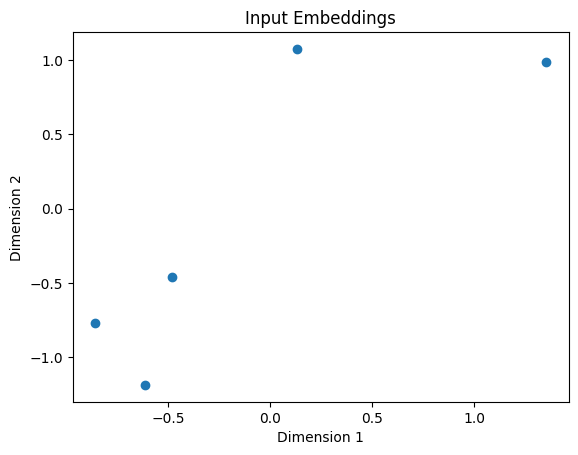

In [47]:
import matplotlib.pyplot as plt
with torch.no_grad():
    # extract the embeddings from the input tensor
    embeddings = input[0, :, :2]

    # create a scatter plot of the first two dimensions of the embeddings
    plt.scatter(embeddings[:, 0], embeddings[:, 1])

    # add a title and axis labels
    plt.title('Input Embeddings')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')

    # show the plot
    plt.show()


TypeError: Invalid shape (1, 128, 5) for image data

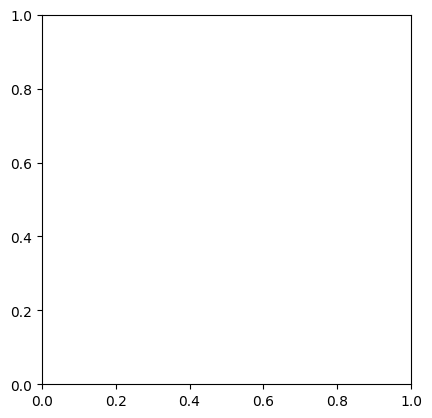

In [48]:
import matplotlib.pyplot as plt
import numpy as np

output = encoder_output.transpose(1,2)
output = output.detach().numpy()

plt.imshow(output, cmap='hot')
plt.show()